<a href="https://colab.research.google.com/github/addo561/Pytorch-book-chapters/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np

Logistic Regression

In [10]:
class LogisticRegression:
  def __init__(self,eta,n_iter,random_state):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    samples,n_features = X.shape
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc=0.0,scale=0.01,size=n_features)
    self.b = float(0.)
    self.losses = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w += self.eta * 2.0 * X.T.dot(errors)/samples
      self.b += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output))-((1-y).dot(np.log(1 - output)))/samples)

      self.losses.append(loss)

    return self

  def  net_input(self,X):
    return np.dot(X,self.w) + self.b

  def activation(self,net):
    return 1/(1+np.exp(-net))
  def predict (self,X):
    return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)




In [11]:
Lr = LogisticRegression(0.01,1000,random_state=1)

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()
X = cancer['data'][:, :2] # Only take the first two features for visualization
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [13]:
Lr.fit(X_train,y_train)

In [14]:
pred = Lr.predict(X_test)

In [15]:
acc = np.sum(pred==y_test)/len(y_test)
acc

0.5263157894736842

In [31]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0],
      y=X[y == cl, 1],
      alpha=0.8,
      c=colors[idx],
      marker=markers[idx],
      label=f'Class {cl}',
      edgecolor='black')


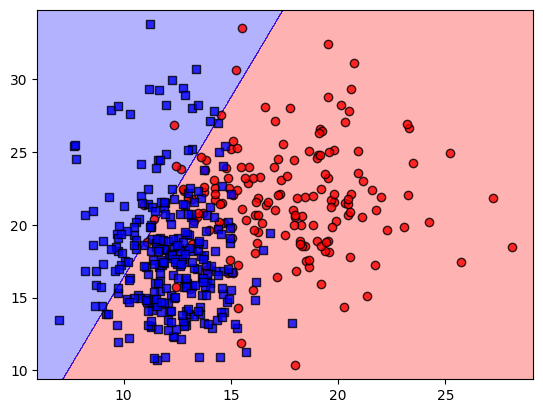

In [32]:
plot_decision_regions(X_train,y_train,classifier=Lr)

Using sklearn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(C=100,multi_class='ovr',solver='lbfgs')

In [21]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100, multi_class='ovr')

In [23]:
pred = lr.predict(X_test)

In [24]:
acc = np.sum(pred==y_test)/len(y_test)
acc

0.9385964912280702

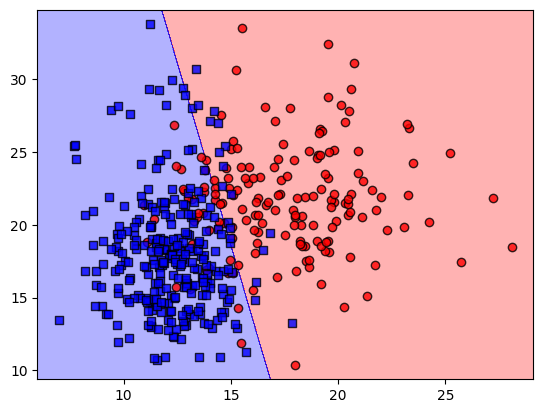

In [35]:
plot_decision_regions(X_train,y_train,classifier=lr)

check predictions

In [38]:
lr.predict_proba(X_test[:3,:])

array([[0.04144647, 0.95855353],
       [0.00212874, 0.99787126],
       [0.04401023, 0.95598977]])

In [41]:
lr.predict_proba(X_test[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [39]:
lr.predict_proba(X_test[:3,:]).argmax(axis=1)

array([1, 1, 1])

In [42]:
lr.predict(X_test[:3,:])

array([1, 1, 1])

In [43]:
lr.predict(X_test[0,:].reshape(1,-1))

array([1])